In [76]:
import numpy as np
import cv2 as cv
from OpenGL.GL import *
from OpenGL.GLU import * 
from OpenGL.GLUT import *
import matplotlib.pyplot as plt
from beamngpy import BeamNGpy, Scenario, Vehicle
from beamngpy.sensors import Camera, Lidar

In [63]:
client = BeamNGpy("localhost", 64256, home="D:\Downloads\BeamNG tech v0 24 0 2\BeamNG.drive-0.24.0.2.13392")
client.open()

In [64]:
scenario = Scenario("west_coast_usa", "road_map_example")
orig = (568.908386, 13.4217358,  148.56546)

vehicle = Vehicle("ego_vehicle", model="etk800", license="PYTHON")
scenario.add_vehicle(vehicle, pos=orig)
scenario.make(client)

In [65]:
client.load_scenario(scenario)
client.start_scenario()

In [78]:
if "camera" in vehicle.sensors:
    vehicle.detach_sensor("camera")
if "lidar" in vehicle.sensors:
    vehicle.detach_sensor("lidar")

lidar = Lidar()
vehicle.attach_sensor("lidar", lidar)
vehicle.poll_sensors()

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [75]:
# print(vehicle.sensors)
# camera = Camera(pos=center, direction=(1, 0, 0), fov=90, resolution=(256, 256))
# camera = Camera((0, -10, 5), (0, 1, -0.75), 60, (1024, 1024))
camera = Camera(pos=(0, 5, 5), direction=(0, 1, 1), fov=60, resolution=(512, 512))
vehicle.attach_sensor("camera", camera)

PermissionError: [WinError 5] Access is denied

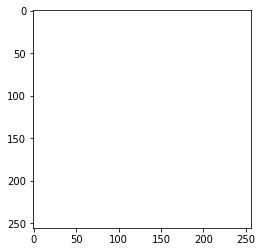

In [55]:
image = client.poll_sensors(vehicle)["camera"]["colour"]
plt.imshow(image)